# Apprentissage supervisé: Classification de chiffres ecrits à la main

In this section we'll apply scikit-learn to the classification of handwritten
digits.  This will go a bit beyond the iris classification we saw before: we'll
discuss some of the metrics which can be used in evaluating the effectiveness
of a classification model.

Adapté du cours de Gaël Varoquaux

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

We'll re-use some of our code from before to visualize the data and remind us what
we're looking at:

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

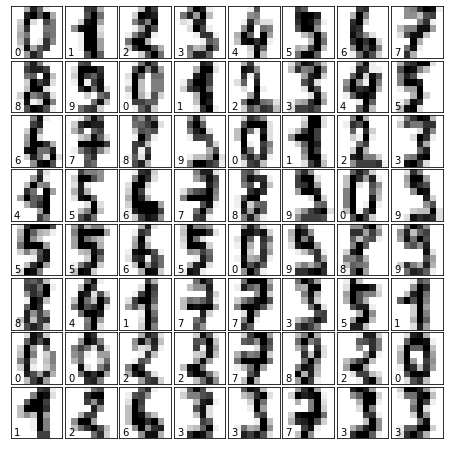

In [3]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Visualisation des données

Afin de visualiser des données 

A good first-step for many problems is to visualize the data using a
*Dimensionality Reduction* technique.  We'll start with the
most straightforward one, Principal Component Analysis (PCA).

PCA seeks orthogonal linear combinations of the features which show the greatest
variance, and as such, can help give you a good idea of the structure of the
data set.  You can use `PCA` or use `RandomizedPCA`, because it's faster for large `N`.

Creer la projection `proj` des variable 

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="randomized")
proj = pca.fit_transform(digits.data)

Faire un plot avec `plt.scatter(X1, X2, c=y)` et `plt.colorbar();` 

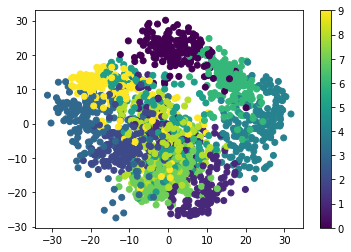

In [5]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar();

**Question: Given these projections of the data, which numbers do you think
a classifier might have trouble distinguishing?**

## Logistic Regression Classification

Use a
Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [7]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

/Users/Valou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Question**: why did we split the data into training and validation sets?

In order to avoid overfitting and calculate 

Let's plot the digits again with the predicted labels to get an idea of
how well the classification is working:

On affiche en vert quand la prediciton est bonne et en rouge quand elle est mauvaise (utiliser la variable `predicted`). 

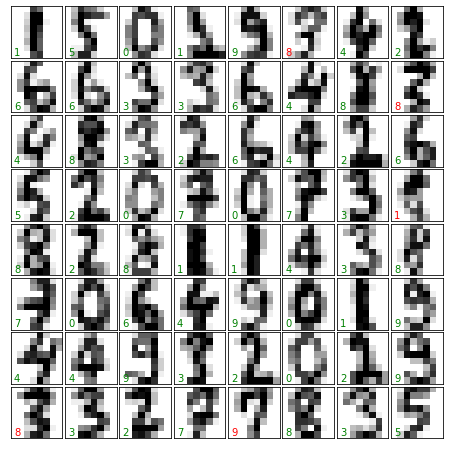

In [9]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

## Quantitative Measurement of Performance

We'd like to measure the performance of our estimator without having to resort
to plotting examples.  A simple method might be to simply compare the number of
matches:

In [19]:
matches

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

436
450


In [11]:
matches.sum() / float(len(matches))

0.9688888888888889

### Maintenant plus de métriques : 

We see that nearly 1500 of the 1800 predictions match the input.  But there are other
more sophisticated metrics that can be used to judge the performance of a classifier:
several are available in the ``sklearn.metrics`` submodule.

One of the most useful metrics is the ``classification_report``, which combines several
measures and prints a table with the results:

Utiliser `pandas.DataFrame` pour visualiser de manière simple. 

In [12]:
from sklearn import metrics
from pandas import DataFrame
DataFrame(metrics.classification_report(expected, predicted, output_dict=True)).T

precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   41.000000
1              0.942308  0.980000  0.960784   50.000000
2              1.000000  0.978261  0.989011   46.000000
3              0.972222  0.921053  0.945946   38.000000
4              0.963636  0.981481  0.972477   54.000000
5              1.000000  0.911111  0.953488   45.000000
6              1.000000  1.000000  1.000000   47.000000
7              0.975610  0.952381  0.963855   42.000000
8              0.894737  0.944444  0.918919   36.000000
9              0.944444  1.000000  0.971429   51.000000
accuracy       0.968889  0.968889  0.968889    0.968889
macro avg      0.969296  0.966873  0.967591  450.000000
weighted avg   0.969887  0.968889  0.968903  450.000000

## Matrice de confusion 

Another enlightening metric for this sort of multi-label classification
is a *confusion matrix*: it helps us visualize which labels are
being interchanged in the classification errors:

In [13]:
DataFrame(metrics.confusion_matrix(expected, predicted))

0   1   2   3   4   5   6   7   8   9
0  41   0   0   0   0   0   0   0   0   0
1   0  49   0   0   1   0   0   0   0   0
2   0   0  45   0   0   0   0   0   1   0
3   0   0   0  35   0   0   0   0   3   0
4   0   0   0   0  53   0   0   1   0   0
5   0   1   0   1   1  41   0   0   0   1
6   0   0   0   0   0   0  47   0   0   0
7   0   0   0   0   0   0   0  40   0   2
8   0   2   0   0   0   0   0   0  34   0
9   0   0   0   0   0   0   0   0   0  51

Que vois-t-on de particulier par rapport aux erreur de notre modèle ? Est-ce normal ? 

# Tester sur l'ensemble d'entrainement 

Regardons si le modele est meilleur sur l'ensemble qu'il a utilisé pour s'entrainer

In [14]:
print('score sur training set: ', clf.score(X_train, y_train))
print('score sur test set: ', clf.score(X_test, y_test))

score sur training set:  1.0
score sur test set:  0.9688888888888889


# Comparaison avec un autre modele : le Bayesien Naïf

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
clf_NB = GaussianNB()

clf_NB.fit(X_train, y_train)

GaussianNB()

In [17]:
print('score sur training set: ', clf_NB.score(X_train, y_train))
print('score sur test set: ', clf_NB.score(X_test, y_test))

score sur training set:  0.8567186340014847
score sur test set:  0.8333333333333334
